In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from scipy.ndimage import convolve
import cv2

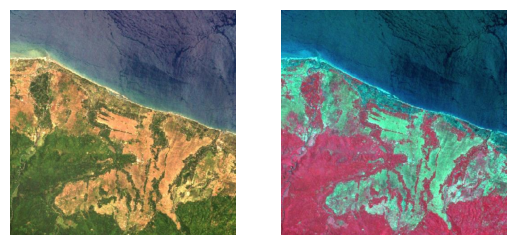

In [25]:
image=Image.open('imag/NaturalColorImages.jpg')
image1=Image.open('imag/FalseColorImages.jpg')
plt.subplot(121)
plt.axis('off') 
plt.imshow(image)
plt.subplot(122)
plt.axis('off') 
plt.imshow(image1)
#R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

Filtre Prewitt

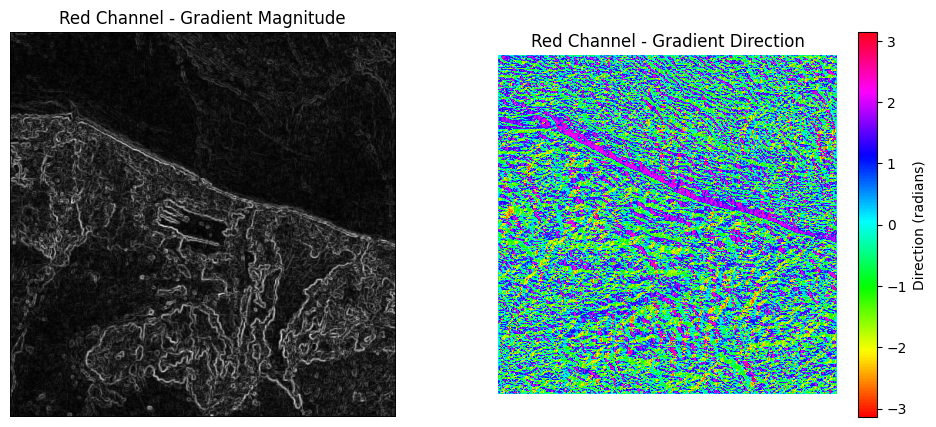

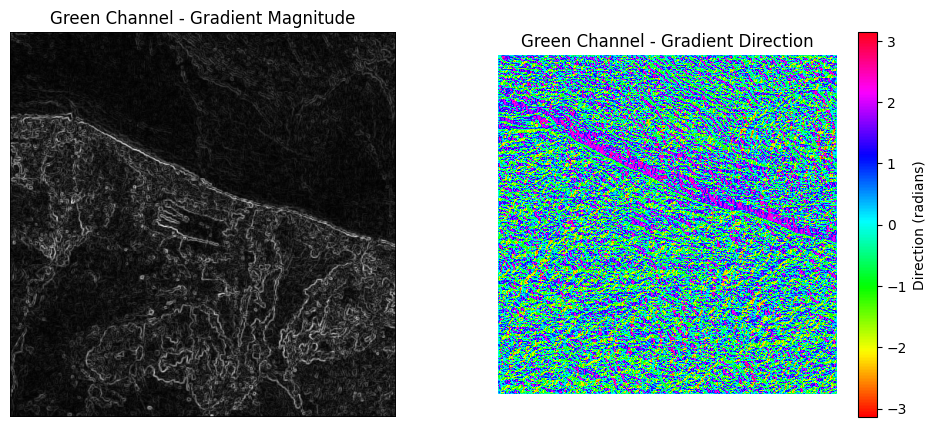

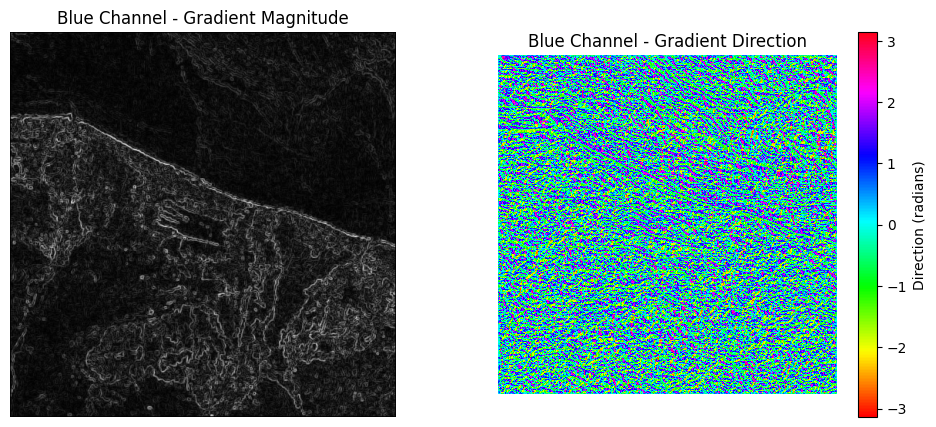

Amplitude of the Sobel filters:
 [[1.41421356 1.         1.41421356]
 [1.         0.         1.        ]
 [1.41421356 1.         1.41421356]]


In [23]:
image_rgb = np.array(Image.open('imag/NaturalColorImages.jpg'))
channels = ['Red', 'Green', 'Blue']
gradients = {}
Gx = np.array([[-1, 0, 1], [-1, 0, +1], [-1, 0, 1]])
Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
for idx, channel in enumerate(channels):
    gray_img = image_rgb[:, :, idx].astype(np.float64)
    h, w = gray_img.shape
    gradient_magnitude = np.zeros((h, w), dtype=np.float64)
    gradient_direction = np.zeros((h, w), dtype=np.float64)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = np.sum(Gx * gray_img[i-1:i+2, j-1:j+2])
            verticalGrad = np.sum(Gy * gray_img[i-1:i+2, j-1:j+2])
            gradient_magnitude[i, j] = np.sqrt(horizontalGrad**2 + verticalGrad**2)
            gradient_direction[i, j] = np.arctan2(verticalGrad, horizontalGrad)
    gradients[channel] = (gradient_magnitude, gradient_direction)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title(f"{channel} Channel - Gradient Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='hsv')
    plt.colorbar(label='Direction (radians)')
    plt.title(f"{channel} Channel - Gradient Direction")
    plt.axis('off')
    plt.show()
    #print(f"{channel} Channel - Gradient Direction:\n", gradient_direction)
    #print(f"{channel} Channel - Gradient Magnitude:\n", gradient_magnitude)
amplitude = np.sqrt(Gx**2 + Gy**2)
print("Amplitude of the Sobel filters:\n", amplitude)


Filtre Sobel

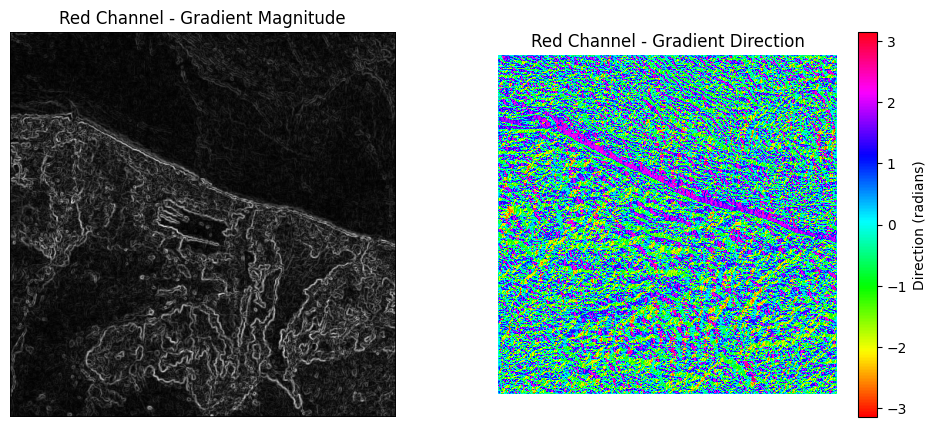

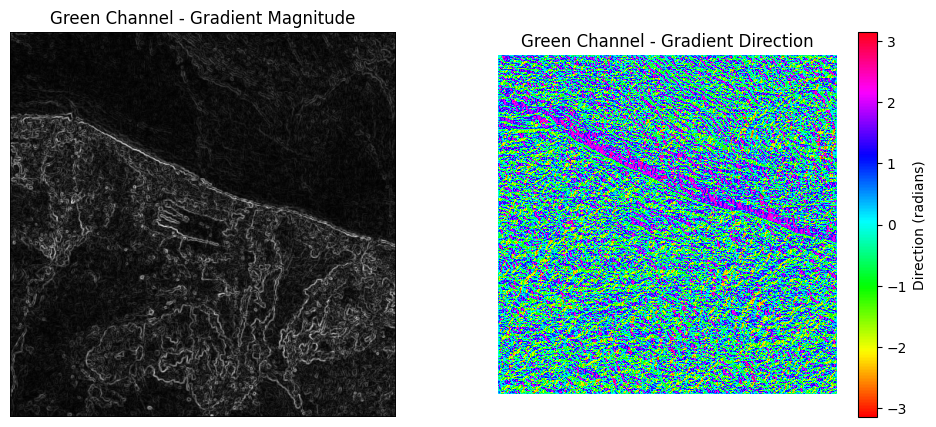

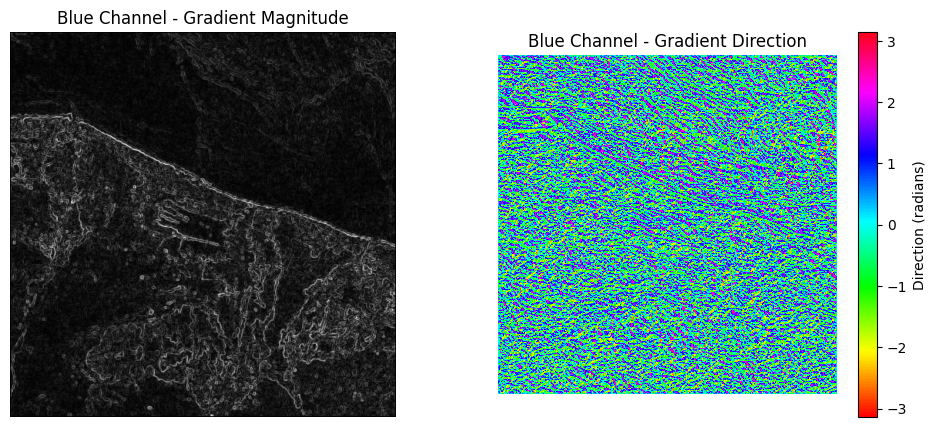

Amplitude of the Sobel filters:
 [[1.41421356 2.         1.41421356]
 [2.         0.         2.        ]
 [1.41421356 2.         1.41421356]]


In [12]:
image_rgb = np.array(Image.open('imag/NaturalColorImages.jpg'))
channels = ['Red', 'Green', 'Blue']
gradients = {}
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
for idx, channel in enumerate(channels):
    gray_img = image_rgb[:, :, idx].astype(np.float64)
    h, w = gray_img.shape
    gradient_magnitude = np.zeros((h, w), dtype=np.float64)
    gradient_direction = np.zeros((h, w), dtype=np.float64)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = np.sum(Gx * gray_img[i-1:i+2, j-1:j+2])
            verticalGrad = np.sum(Gy * gray_img[i-1:i+2, j-1:j+2])
            gradient_magnitude[i, j] = np.sqrt(horizontalGrad**2 + verticalGrad**2)
            gradient_direction[i, j] = np.arctan2(verticalGrad, horizontalGrad)
    gradients[channel] = (gradient_magnitude, gradient_direction)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title(f"{channel} Channel - Gradient Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='hsv')
    plt.colorbar(label='Direction (radians)')
    plt.title(f"{channel} Channel - Gradient Direction")
    plt.axis('off')
    plt.show()
    #print(f"{channel} Channel - Gradient Direction:\n", gradient_direction)
    #print(f"{channel} Channel - Gradient Magnitude:\n", gradient_magnitude)
amplitude = np.sqrt(Gx**2 + Gy**2)
print("Amplitude of the Sobel filters:\n", amplitude)


Filtre Laplacien

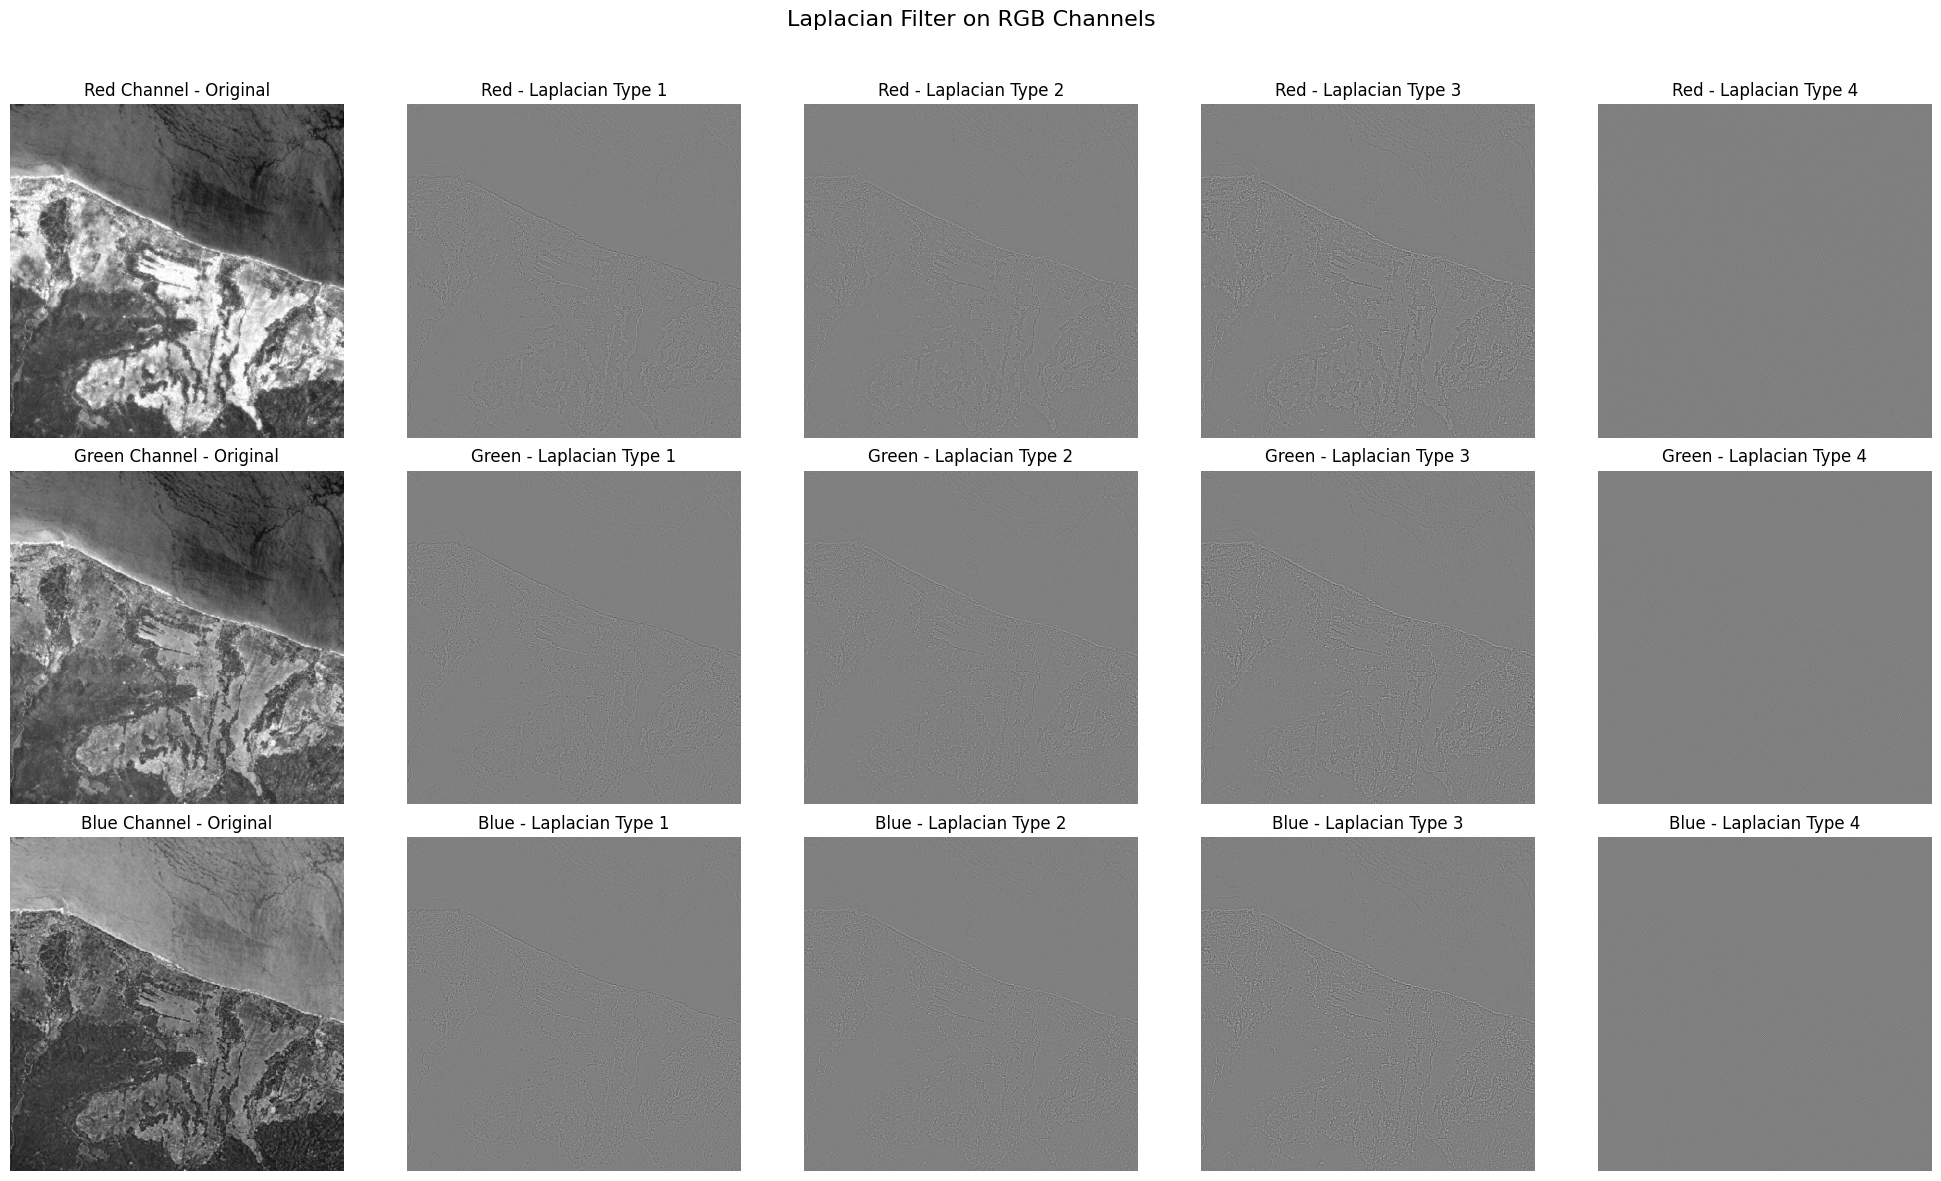

In [ ]:
def apply_laplacian(image, kernel, threshold=10):
    h, w = image.shape
    filtered_img = np.zeros_like(image)
    for i in range(1, h-1):
        for j in range(1, w-1):
            region = image[i-1:i+2, j-1:j+2]
            filtered_value = np.sum(region * kernel)
            filtered_img[i, j] = filtered_value
    filtered_img = filtered_img / np.max(np.abs(filtered_img))
    filtered_img = np.where(np.abs(filtered_img) > threshold / 255, filtered_img, 0)
    return filtered_img
image_path = 'imag/NaturalColorImages.jpg'
image_rgb = np.array(Image.open(image_path))
laplacian_masks = {
    'Type 1': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    'Type 2': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    'Type 3': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Type 4': np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]])
}
channels = ['Red', 'Green', 'Blue']
plt.figure(figsize=(20, 12))
plt.suptitle("Laplacian Filter on RGB Channels", fontsize=16)

for ch_idx, channel in enumerate(channels):
    gray_img = image_rgb[:, :, ch_idx].astype(np.float64)
    plt.subplot(3, len(laplacian_masks) + 1, ch_idx * (len(laplacian_masks) + 1) + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f"{channel} Channel - Original")
    plt.axis('off')
    for idx, (name, mask) in enumerate(laplacian_masks.items()):
        filtered = apply_laplacian(gray_img, mask)
        plt.subplot(3, len(laplacian_masks) + 1, ch_idx * (len(laplacian_masks) + 1) + idx + 2)
        plt.imshow(filtered, cmap='gray', vmin=-1, vmax=1)
        plt.title(f"{channel} - Laplacian {name}")
        plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Log

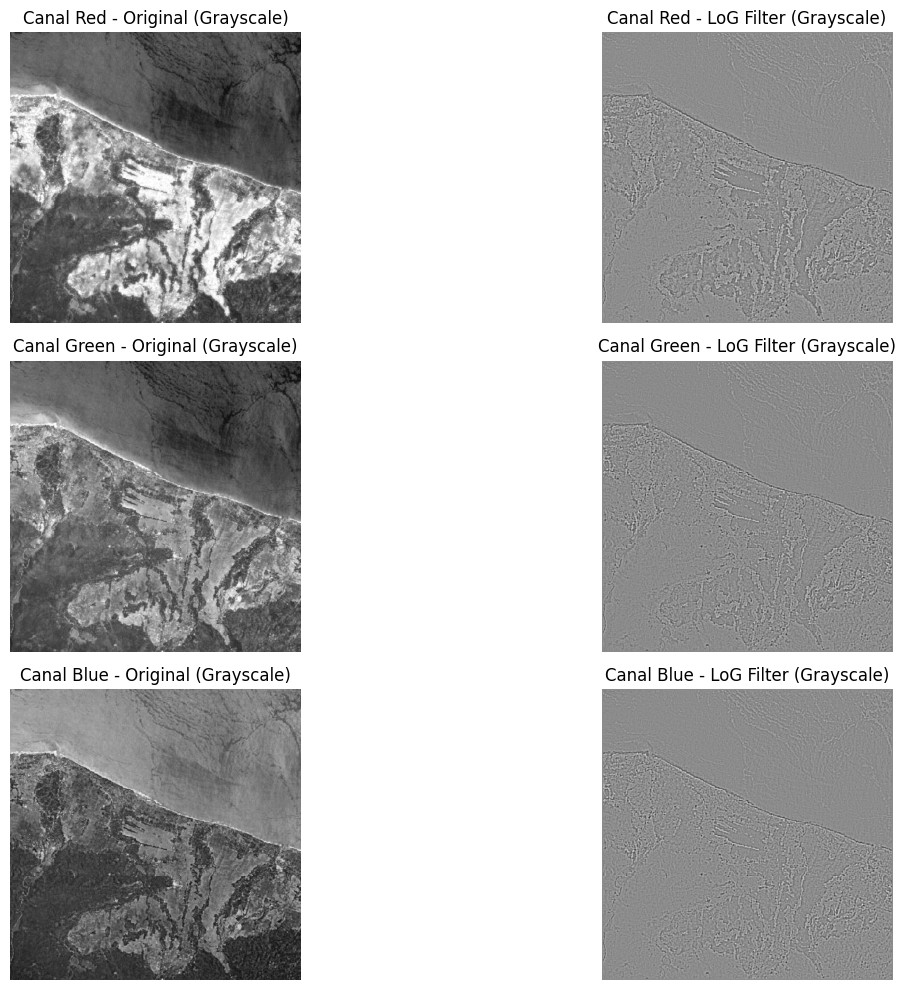

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(
            -((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)

def log_filter(image, size, sigma):
    kernel_gaussian = gaussian_kernel(size, sigma)
    kernel_log = (np.fromfunction(
        lambda x, y: ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2 - 2 * sigma**2) / (sigma**4),
        (size, size)
    )) * kernel_gaussian
    kernel_log -= kernel_log.mean()
    h, w = image.shape
    kh, kw = kernel_log.shape
    pad_h, pad_w = kh // 2, kw // 2
    log_image = np.zeros_like(image)
    for i in range(pad_h, h - pad_h):
        for j in range(pad_w, w - pad_w):
            region = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            log_image[i, j] = np.sum(region * kernel_log)
    log_image = 255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image))    
    return log_image.astype(np.uint8)
image_path = 'imag/NaturalColorImages.jpg'
image = np.array(Image.open(image_path)).astype(np.float64)
size = 5   
sigma = 1.0 
plt.figure(figsize=(15, 10))

for i, color in enumerate(['Red', 'Green', 'Blue']):
    channel = image[:, :, i]
    channel_log = log_filter(channel, size, sigma)
    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Canal {color} - Original (Grayscale)')
    plt.axis('off')
    plt.subplot(3, 2, 2*i + 2)
    plt.imshow(channel_log, cmap='gray')
    plt.title(f'Canal {color} - LoG Filter (Grayscale)')
    plt.axis('off')

plt.tight_layout()
plt.show()



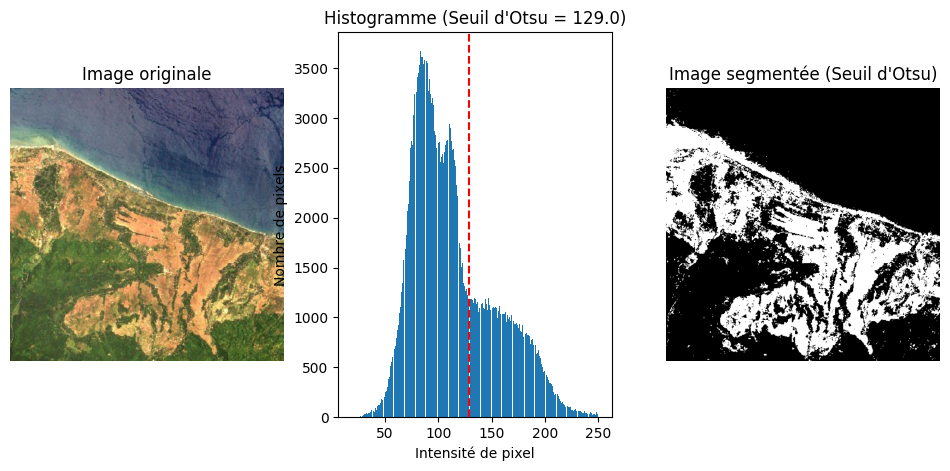

In [ ]:
#Avec CV2
image_path = 'imag/NaturalColorImages.jpg'
image_rgb = Image.open(image_path)
gray_image = image_rgb.convert('L')  
gray_image = np.array(gray_image)
threshold, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.hist(gray_image.ravel(), bins=256)
plt.axvline(threshold, color='r', linestyle='--')
plt.title(f"Histogramme (Seuil d'Otsu = {threshold})")
plt.xlabel("Intensité de pixel")
plt.ylabel("Nombre de pixels")

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title("Image segmentée (Seuil d'Otsu)")
plt.axis("off")

plt.show()


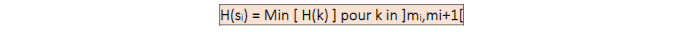

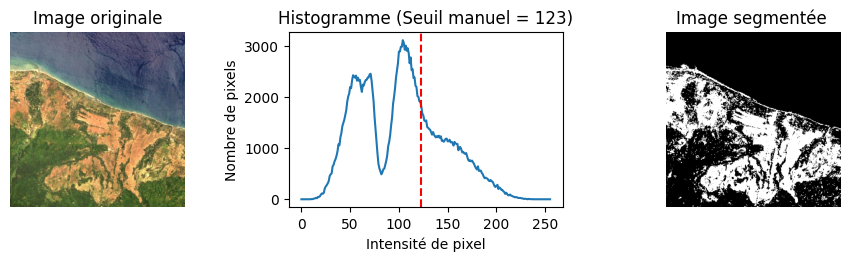

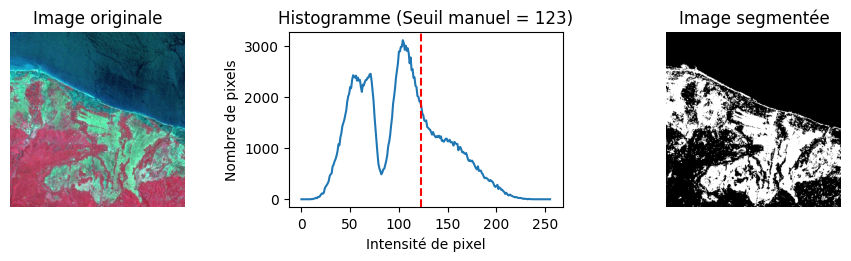

In [20]:
#GLOBAL
image_path = 'imag/NaturalColorImages.jpg'
image2='imag/FalseColorImages.jpg'
image_rgb = Image.open(image_path)
image_rgb2=Image.open(image2)
gray_image = image_rgb.convert('L')  
gray_image2 = image_rgb2.convert('L')  
gray_image = np.array(gray_image)
gray_image2 = np.array(gray_image2)
hist, bin_edges = np.histogram(gray_image, bins=256, range=(0, 255))
hist, bin_edges = np.histogram(gray_image2, bins=256, range=(0, 255))

m = np.mean(gray_image)  
m2 = np.mean(gray_image2)  
min_val = np.inf
threshold = 0
for k in range(int(m) - 10, int(m) + 10):
    if hist[k] < min_val:
        min_val = hist[k]
        threshold = k
binary_image = np.where(gray_image >= threshold, 255, 0).astype(np.uint8)
binary_image2 = np.where(gray_image2 >= threshold, 255, 0).astype(np.uint8)
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.imshow(image_rgb, cmap='gray')
plt.title("Image originale")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.plot(hist)
plt.axvline(threshold, color='r', linestyle='--')
plt.title(f"Histogramme (Seuil manuel = {threshold})")
plt.xlabel("Intensité de pixel")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 3, 3)
plt.imshow(binary_image2, cmap='gray')
plt.title("Image segmentée ")
plt.axis("off")
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.imshow(image_rgb2, cmap='gray')
plt.title("Image originale")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.plot(hist)
plt.axvline(threshold, color='r', linestyle='--')
plt.title(f"Histogramme (Seuil manuel = {threshold})")
plt.xlabel("Intensité de pixel")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 3, 3)
plt.imshow(binary_image2, cmap='gray')
plt.title("Image segmentée")
plt.axis("off")

plt.show()


Itération 1/100
Itération 2/100
Itération 3/100
Itération 4/100
Itération 5/100
Itération 6/100
Itération 7/100
Itération 8/100
Itération 9/100
Itération 10/100
Itération 11/100
Itération 12/100
Itération 13/100
Itération 14/100
Itération 15/100
Itération 16/100
Itération 17/100
Itération 18/100
Itération 19/100
Itération 20/100
Itération 21/100
Itération 1/100
Itération 2/100
Itération 3/100
Itération 4/100
Itération 5/100
Itération 6/100
Itération 7/100
Itération 8/100
Itération 9/100
Itération 10/100
Itération 11/100
Itération 12/100
Itération 13/100
Itération 14/100
Itération 15/100
Itération 16/100
Itération 17/100
Itération 18/100
Itération 19/100
Itération 20/100
Itération 21/100
Itération 22/100
Itération 23/100
Itération 24/100
Itération 25/100
Itération 26/100
Itération 27/100
Itération 28/100
Itération 29/100
Itération 30/100
Itération 31/100
Itération 32/100
Itération 33/100
Itération 34/100
Itération 35/100
Itération 36/100
Itération 37/100
Itération 38/100
Itération 39/10

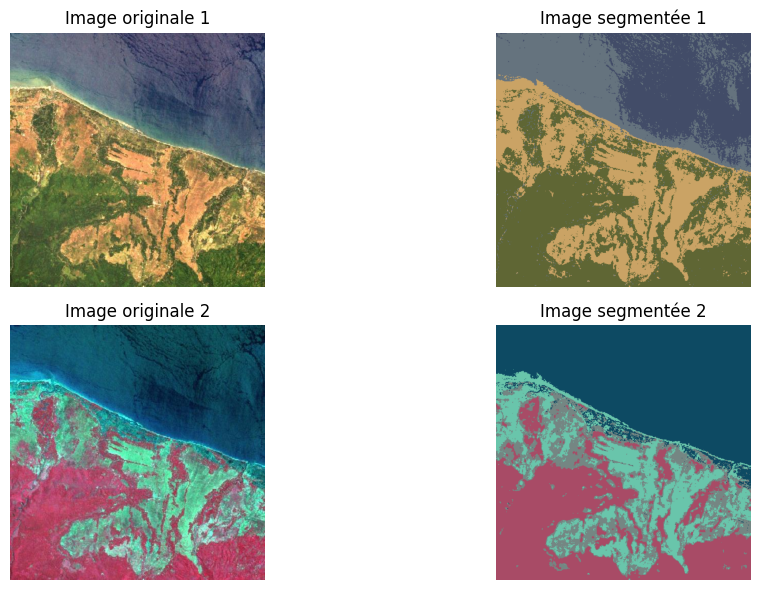

In [6]:
def initialize_centroids(image, K):
    # Initialisation des centres de clusters en choisissant des pixels aléatoires
    h, w, _ = image.shape
    random_indices = np.random.choice(h * w, K, replace=False)
    centroids = [image[index // w, index % w] for index in random_indices]
    return np.array(centroids)


def assign_clusters(image, centroids):
    # Assigner chaque pixel au cluster le plus proche
    h, w, _ = image.shape
    clusters = np.zeros((h, w), dtype=int)
    for i in range(h):
        for j in range(w):
            distances = np.linalg.norm(image[i, j] - centroids, axis=1)
            clusters[i, j] = np.argmin(distances)
    return clusters

def update_centroids(image, clusters, K):
    # Mettre à jour les centres de clusters en calculant la moyenne des pixels dans chaque cluster
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_pixels = image[clusters == k]
        if len(cluster_pixels) > 0:
            new_centroids[k] = np.mean(cluster_pixels, axis=0)
    return new_centroids

def kmeans(image, K, max_iter=100):
    centroids = initialize_centroids(image, K)
    
    for i in range(max_iter):
        print(f"Itération {i+1}/{max_iter}")
        clusters = assign_clusters(image, centroids)
        new_centroids = update_centroids(image, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Création de l'image segmentée
    segmented_image = np.zeros_like(image)
    for k in range(K):
        segmented_image[clusters == k] = centroids[k]
    
    return segmented_image

image_path = 'imag/NaturalColorImages.jpg'
image2_path = 'imag/FalseColorImages.jpg'
image = np.array(Image.open(image_path))
image2 = np.array(Image.open(image2_path))
K = 4
segmented_image1 = kmeans(image, K)
segmented_image2 = kmeans(image2, K)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Image originale 1")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(segmented_image1.astype(np.uint8))
plt.title("Image segmentée 1")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image2)
plt.title("Image originale 2")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(segmented_image2.astype(np.uint8))
plt.title("Image segmentée 2")
plt.axis("off")

plt.tight_layout()
plt.show()
